In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

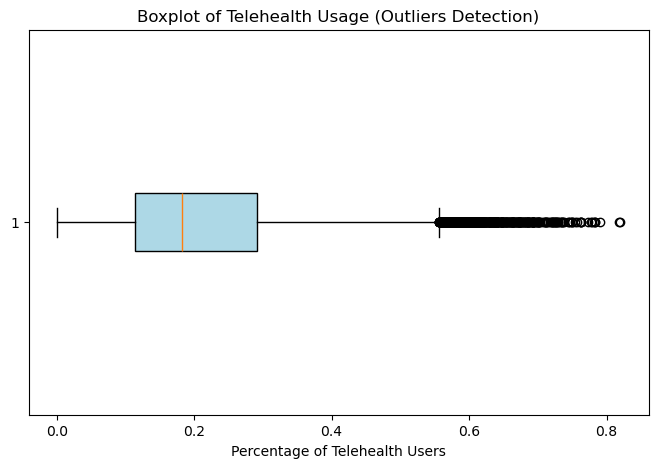

In [2]:
medicare_cleaned = pd.read_csv("./data/medicare_cleaned.csv")
plt.figure(figsize=(8, 5))
plt.boxplot(medicare_cleaned["Pct_Telehealth"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.xlabel("Percentage of Telehealth Users")
plt.title("Boxplot of Telehealth Usage (Outliers Detection)")
plt.show()

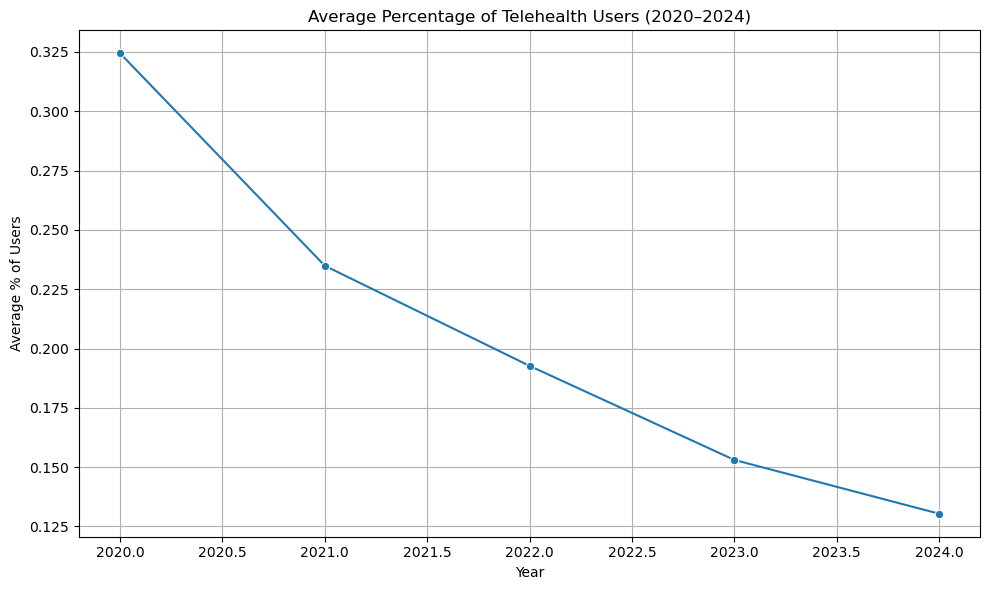

In [3]:
# Research Question 1
avg_percent_by_year = medicare_cleaned.groupby('Year')['Pct_Telehealth'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_percent_by_year, x='Year', y='Pct_Telehealth', marker='o')
plt.title('Average Percentage of Telehealth Users (2020–2024)')
plt.ylabel('Average % of Users')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Average Rural Telehealth Visits: 63046.26
Average Urban Telehealth Visits: 288016.00
T-statistic: -8.4280
P-value: 8.4194e-17


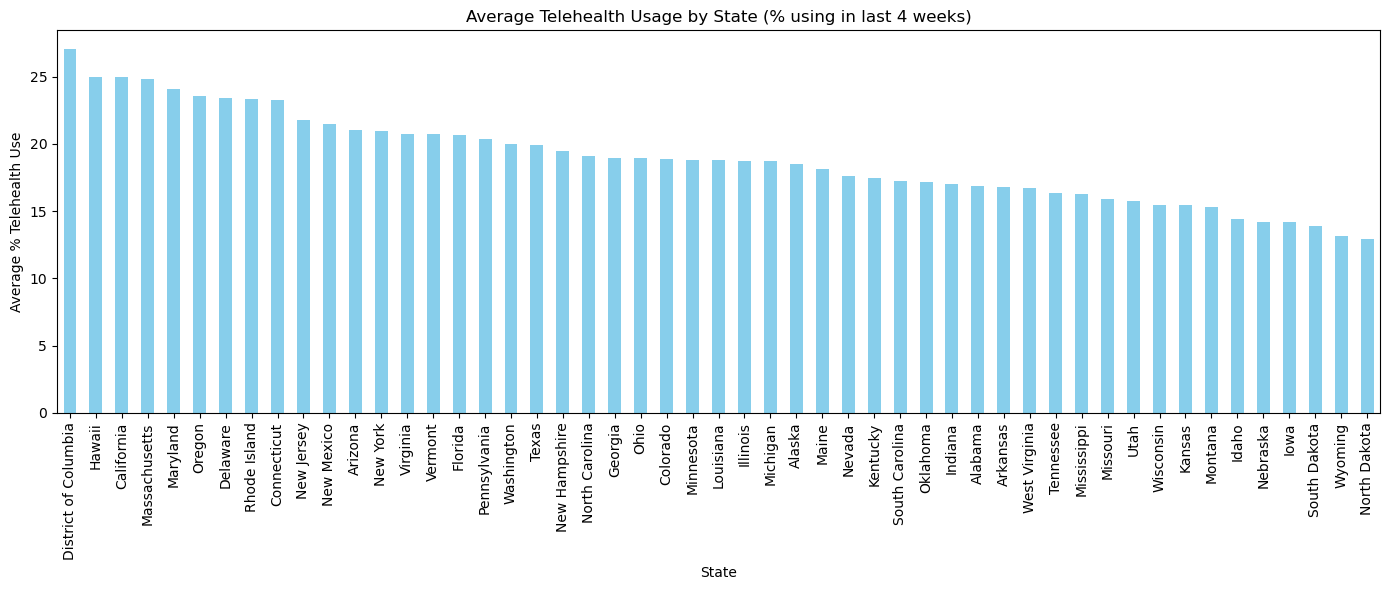

Top 5 States by Average Telehealth Usage:
 State
District of Columbia    27.095122
Hawaii                  24.975610
California              24.961905
Massachusetts           24.816667
Maryland                24.092857
Name: Value, dtype: float64

Bottom 5 States by Average Telehealth Usage:
 State
Nebraska        14.211905
Iowa            14.163415
South Dakota    13.902778
Wyoming         13.138889
North Dakota    12.896875
Name: Value, dtype: float64


In [4]:
# Research Question 2
# Load Medicare dataset
medicare_df = pd.read_csv("./data/medicare_cleaned.csv")

# Filter for Rural and Urban
rural_df = medicare_df[medicare_df['Bene_RUCA_Desc'] == 'Rural']
urban_df = medicare_df[medicare_df['Bene_RUCA_Desc'] == 'Urban']

# Calculate mean telehealth visits
rural_mean = rural_df['Total_Bene_Telehealth'].mean()
urban_mean = urban_df['Total_Bene_Telehealth'].mean()

print(f"Average Rural Telehealth Visits: {rural_mean:.2f}")
print(f"Average Urban Telehealth Visits: {urban_mean:.2f}")

# Perform t-test
t_stat, p_val = ttest_ind(rural_df['Total_Bene_Telehealth'], 
                        urban_df['Total_Bene_Telehealth'], 
                        equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")

# Load state-level telehealth usage dataset
tele_state_df = pd.read_csv("./data/telemedicine_group_By_State.csv")

# Group by state and calculate average usage
state_usage_avg = tele_state_df.groupby('State')['Value'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(14, 6))
state_usage_avg.plot(kind='bar', color='skyblue')
plt.title('Average Telehealth Usage by State (% using in last 4 weeks)')
plt.xlabel('State')
plt.ylabel('Average % Telehealth Use')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display top and bottom 5 states
top_5 = state_usage_avg.head(5)
bottom_5 = state_usage_avg.tail(5)

print("Top 5 States by Average Telehealth Usage:\n", top_5)
print("\nBottom 5 States by Average Telehealth Usage:\n", bottom_5)